# Example notebook for analysing and plotting dataset-focused paper figures in Google Colab
### [OpenScope Credit Assignment repository](https://github.com/colleenjg/OpenScope_CA_Analysis/tree/minimal)


---
## 1. Setup

In [1]:
# @markdown ### Install required python packages.
# @markdown #### _Torch requirement errors can be ignored._
# @markdown #### **Note:** The kernel will be restarted to ensure the proper package versions are loaded.

print("Installing required packages...\n")

!pip install -q git+https://github.com/colleenjg/OpenScope_CA_Analysis.git@minimal

print("\nRestarting kernel...")
get_ipython().kernel.do_shutdown(True);

Installing required packages...

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.9/305.9 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 31.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 72.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.1/64.1 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 336.0/336.0 kB 36.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 40.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.7/51.7 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.8/117.8 kB 631.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.2/210.2 kB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 73.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

 =============================
### **_Once the kernel has restarted, continue running the cells_**
 =============================

### b. Download data from  the [Dandi archive](https://gui.dandiarchive.org/#/dandiset/000037).
Here, we will only download **session 1 data** (11 files) for all subjects, into a directory called `data`.

We **download the data** using `sess_util/sess_download_util.py`. This will take a few minutes.

**Note:** Any files that _already_ exist in the data directory (and pass the checksum) will be skipped, and **not** redownloaded.

In [1]:
from credassign.util import download_util

print("Downloading data from Dandi (may take a few minutes)...\n")
download_util.download_dandiset_assets(sess_ns=1, output="data")


Identifying the URLs of dandi assets to download...
PATH                                        SIZE       DONE             DONE% CHECKSUM STATUS          MESSAGE
sub-408021_ses-758519303_behavior+ophys.nwb 240.0 MB   240.0 MB          100%    ok    done                   
sub-411400_ses-759666166_behavior+ophys.nwb 1.0 GB     1.0 GB            100%    ok    done                   
sub-411771_ses-760260459_behavior+ophys.nwb 232.4 MB   232.4 MB          100%    ok    done                   
sub-411424_ses-761624763_behavior+ophys.nwb 228.5 MB   228.5 MB          100%    ok    done                   
sub-412933_ses-763949859_behavior+ophys.nwb 1.1 GB     1.1 GB            100%    ok    done                   
sub-413663_ses-764704289_behavior+ophys.nwb 724.7 MB   724.7 MB          100%    ok    done                   
sub-418779_ses-777496949_behavior+ophys.nwb 136.7 MB   136.7 MB          100%    ok    done                   
sub-420011_ses-777914830_behavior+ophys.nwb 316.0 MB   316.

---
## 2. Adjust a few settings in the notebook

In [2]:
# @markdown - Change Google Colab display to wrap text to window size.
# Code from https://stackoverflow.com/questions/58890109/line-wrapping-in-collaboratory-google-results
from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

# @markdown - Filter warnings related to multiprocessing performance.
import warnings
warnings.filterwarnings("ignore", category=UserWarning, message="A worker stopped")
warnings.filterwarnings("ignore", category=UserWarning, message="Requested font")
warnings.filterwarnings("ignore", category=UserWarning, message="Ignoring cached namespace")

# @markdown - Set logging and warnings format.
from credassign.util import logger_util
logger_util.format_all(level='info')

# @markdown - Pre-load matplotlib.
# The first plot never seems to appear inline, so we plot a dummy plot.
%matplotlib inline
from matplotlib import pyplot as plt
plt.plot(range(20))
plt.close("all")


---
## 3. Run paper analyses

We can now run some dataset-focused analyses and plot them.

We use the `run_paper_figures.py` script in the main directory of the OpenScope_CA_Analysis directory, with the following arguments:
- `datadir`: path to the downloaded data
- `output`: main directory in which to store the analysis data and plots
- `overwrite`: if included, existing analysis data and plots are overwritten
- `figure`: figure to plot (either `all` or a specific figure)
- `panel`: panel to plot (either `all` or a specific panel)
- `parallel`: if included, analyses are parallelized across available CPUs


In [ ]:
# Uncomment the code below to see descriptions for all arguments
# %run -m credassign.run_paper_figures -- --help

### Fig. 1B



________________________________________________________________________________
Fig. 1B (dataset paper). Running analysis and producing plot: Example projections of 2p imaging planes.

- Minor manual formatting adjustments may be missing.

Loading 4 session(s)...


  0%|          | 0/4 [00:00<?, ?it/s]


Compiling imaging plane projection examples.
    Rasterizing imaging plane images...

Figures saved under paper_figures/Fig1.
Duration: 18.58s


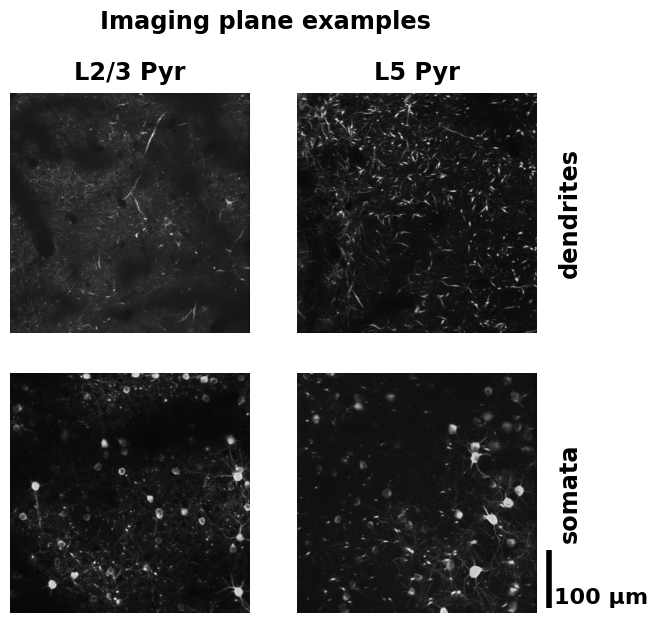

In [3]:
%run -m credassign.run_paper_figures -- --overwrite --figure 1 --panel B --parallel --datadir data --output .
plt.show() # may be necessary in Colab

### Fig. 6A



________________________________________________________________________________
Fig. 6A (dataset paper). Running analysis and producing plot: Full session running and pupil responses.

- Minor manual formatting adjustments may be missing.
- Running and pupil images will be missing.

Loading 1 session(s)...
100%|██████████| 1/1 [00:03<00:00,  3.33s/it]

Compiling pupil and running traces for a full session.

Figures saved under paper_figures/Fig6.
Duration: 8.04s


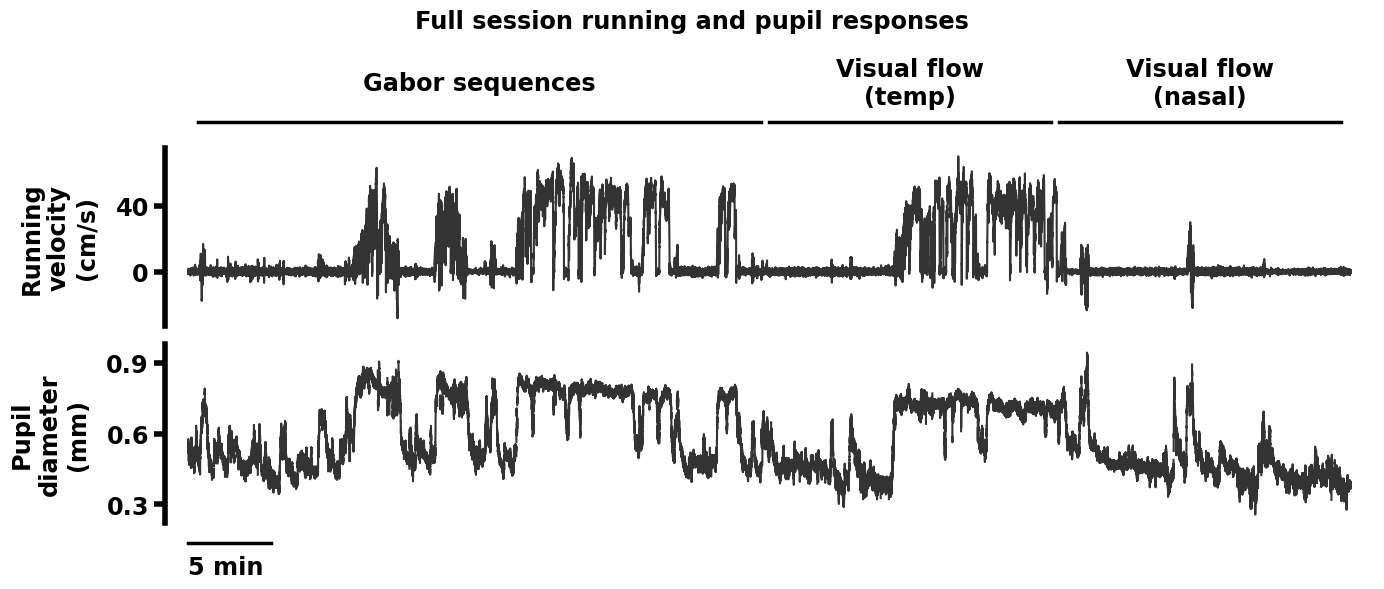

In [4]:
%run -m credassign.run_paper_figures -- --overwrite --figure 6 --panel A --parallel --datadir data --output .
plt.show()

### Fig. 5B
This figure requires more time to analyse and plot.



________________________________________________________________________________
Fig. 5B (dataset paper). Running analysis and producing plot: Example ROI responses to each inconsistent Gabor sequence.

- Minor manual formatting adjustments may be missing.
- This figure panel takes longer to plot, as it requires plotting and rasterizing a large number of items.

Loading 11 session(s)...


  0%|          | 0/11 [00:00<?, ?it/s]


Compiling example ROI responses to inconsistent Gabor sequence from session 1.
    Identifying example ROIs for each session...
    Plotting individual traces...
    Rasterizing individual traces...

Figures saved under paper_figures/Fig5.
Duration: 7m 6.26s


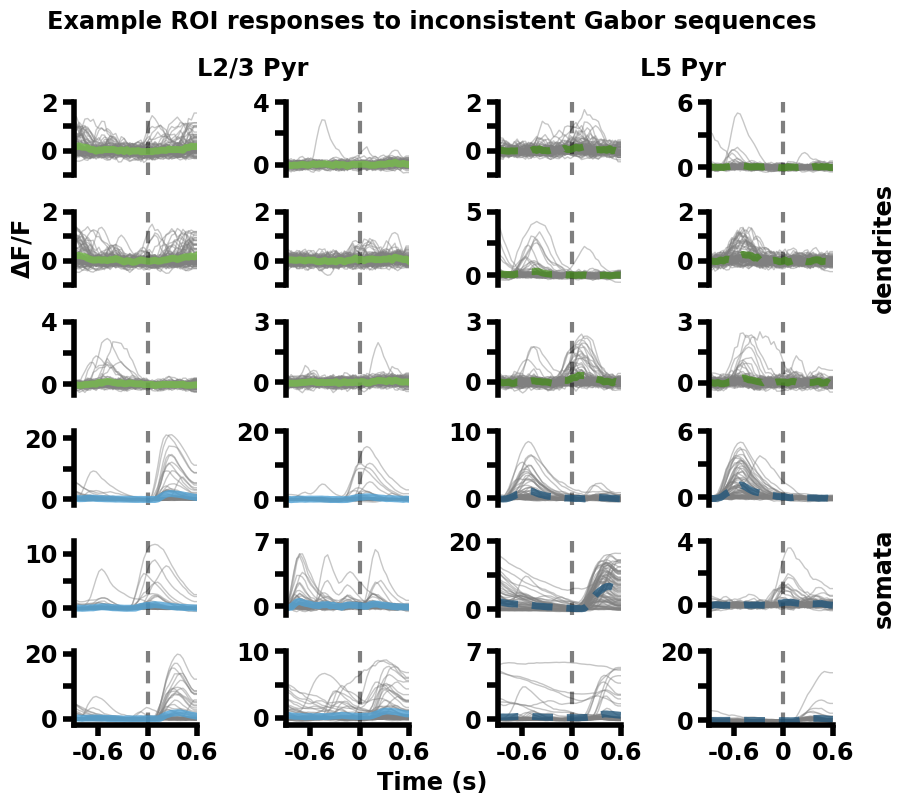

In [5]:
%run -m credassign.run_paper_figures -- --overwrite --figure 5 --panel B --parallel --datadir data --output .
plt.show()

### Fig. 5B, with a different random seed

By default, the script uses the same random process seed as was used for the paper. Here, however, we run the analysis with a different seed, i.e. `100`. This means that the exact traces retained may differ from those shown in the paper.

The results (analysis data and plot) are saved under a subfolder called `panels_with_diff_params`, with the seed number recorded in the file names.



________________________________________________________________________________
Fig. 5B (dataset paper). Running analysis and producing plot: Example ROI responses to each inconsistent Gabor sequence.

- Minor manual formatting adjustments may be missing.
- This figure panel takes longer to plot, as it requires plotting and rasterizing a large number of items.
- Using a different seed from the one used in the paper: 100. Results may differ slightly from published results. To use paper seed, run script with default seed argument, i.e., '--seed paper'.

Loading 11 session(s)...


  0%|          | 0/11 [00:00<?, ?it/s]


Compiling example ROI responses to inconsistent Gabor sequence from session 1.
    Identifying example ROIs for each session...
    Plotting individual traces...
    Rasterizing individual traces...

Figures saved under paper_figures/Fig5/panels_with_diff_params.
Duration: 7m 17.97s


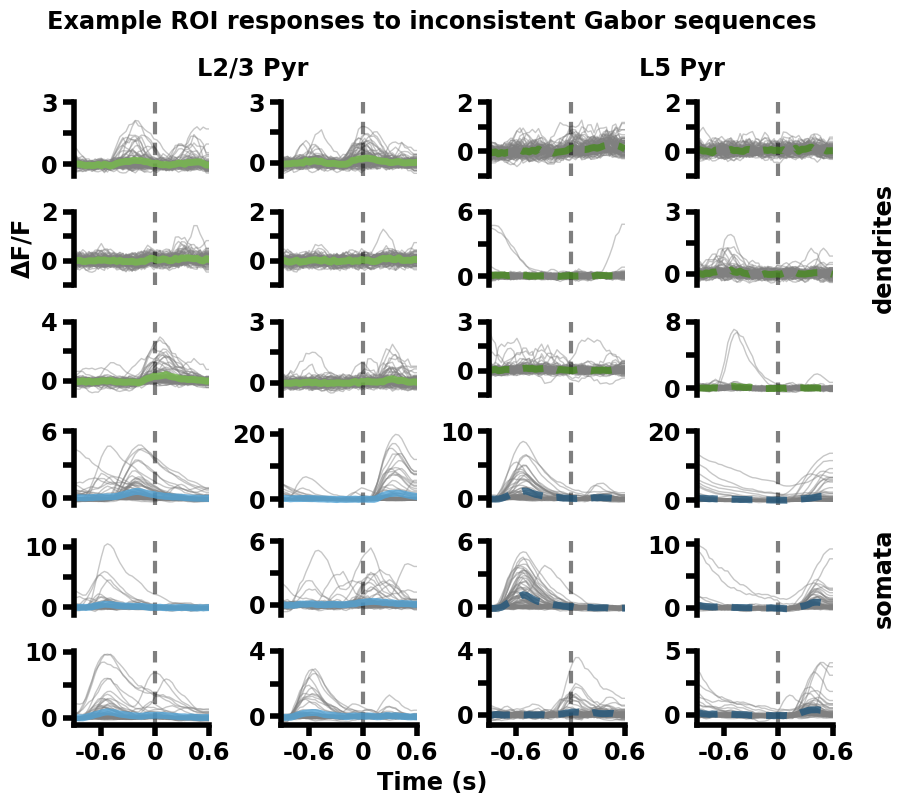

In [6]:
%run -m credassign.run_paper_figures -- --overwrite --figure 5 --panel B --seed 100 --parallel --datadir data --output .
plt.show()

---
## 4. Final Notes

For most other figures and panels, the remaining sessions **(sessions 2 and 3)** must also be downloaded. This can be done by returning to **Step 1d**, and rerunning the download with the argument `--sess_ns 1-3`.

Notably, though, the analyses for some panels are:
- **computationally expensive** or generally **long** to run.

For this reason, they are best run on a **high performance compute device** (e.g., 16+ cores and 32+ GB of RAM).